In [1]:
!pip install tensorflow 

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/93/21/9b035a4f823d6aee2917c75415be9a95861ff3d73a0a65e48edbf210cec1/tensorflow-2.15.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.15.0 from https://files.pythonhosted.org/packages/4c/48/1a5a15517f18eaa4ff8d598b1c000300b20c1bb0e624539d702117a0c369/tensorflow_intel-2.15.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/a2/ad/e0d3c824784ff121c03cc031f944bc7e139a8f1870ffd2845cc2dd76f6c4/absl_py-2.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/6f/12/d5c79ee252793ffe845d58a913197bfa02ae9a0b5c9bc3dc4b58d477b9e7/flatbuffers-23.5.26-py2.py3-none-any.whl.metadata
     ---------------------------------------- 0.0/57.5 kB ? eta -:--:--
     ---------------------------------------- 57.5

In [1]:
#Importing the required libraries
import tensorflow as tf
from tensorflow.keras import layers,models
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
chanels=3
EPOCHS=20

In [3]:
#Load the datasets
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "C:/Users/Admin/Desktop/diseases",
    shuffle=True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 397 files belonging to 3 classes.


In [4]:
class_names = dataset.class_names
class_names 

['early', 'healthy', 'late']

In [5]:
len(dataset)

13

In [6]:
for image_batch , label_batch in dataset.take(1):
  print(image_batch.shape)
  print(label_batch.numpy())

(32, 256, 256, 3)
[1 0 2 1 2 0 2 0 1 0 2 1 0 1 2 2 1 1 1 2 0 0 0 2 1 1 0 1 0 1 2 1]


In [7]:
for image_batch , label_batch in dataset.take(1):
  print(image_batch[0].numpy())

[[[157. 168. 174.]
  [157. 168. 174.]
  [157. 168. 174.]
  ...
  [214. 225. 231.]
  [214. 225. 231.]
  [214. 225. 231.]]

 [[157. 168. 174.]
  [157. 168. 174.]
  [157. 168. 174.]
  ...
  [214. 225. 231.]
  [214. 225. 231.]
  [214. 225. 231.]]

 [[157. 168. 174.]
  [157. 168. 174.]
  [157. 168. 174.]
  ...
  [214. 225. 231.]
  [214. 225. 231.]
  [214. 225. 231.]]

 ...

 [[180. 191. 197.]
  [180. 191. 197.]
  [180. 191. 197.]
  ...
  [214. 225. 231.]
  [214. 225. 231.]
  [214. 225. 231.]]

 [[180. 191. 197.]
  [180. 191. 197.]
  [180. 191. 197.]
  ...
  [214. 225. 231.]
  [214. 225. 231.]
  [214. 225. 231.]]

 [[180. 191. 197.]
  [180. 191. 197.]
  [180. 191. 197.]
  ...
  [214. 225. 231.]
  [214. 225. 231.]
  [214. 225. 231.]]]


In [8]:
for image_batch , label_batch in dataset.take(1):
  print(image_batch[0].shape)

(256, 256, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


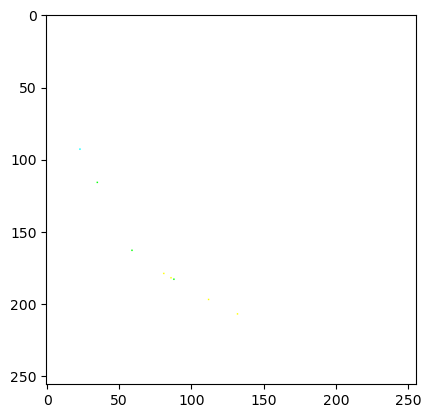

In [9]:
for image_batch , label_batch in dataset.take(1):
  plt.imshow(image_batch[0].numpy())


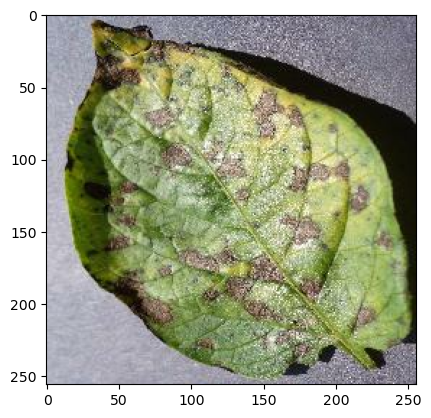

In [10]:
for image_batch , label_batch in dataset.take(1):
  plt.imshow(image_batch[0].numpy().astype("uint8"))

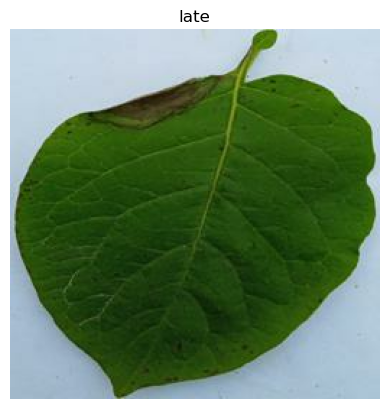

In [11]:
for image_batch , label_batch in dataset.take(1):
  for i in range (12):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.title(class_names[label_batch[0]])
    plt.axis("off")

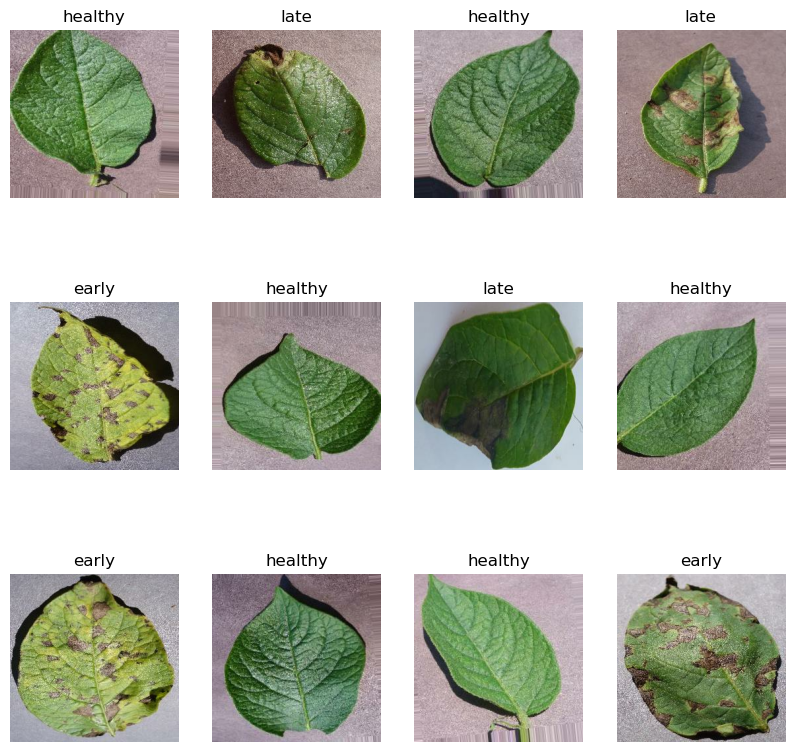

In [12]:
plt.figure(figsize=(10,10))
for image_batch , label_batch in dataset.take(1):
  for i in range (12):
    ax= plt.subplot(3,4 , i+1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title(class_names[label_batch[i]])
    plt.axis("off")

In [13]:
len(dataset)

13

In [14]:
#80% ==>training
#20% ==> 10% validation , 10% test
train_size = 0.8
len(dataset)*train_size

10.4

In [15]:
train_ds= dataset.take(20) #first 20
len(train_ds)

13

In [16]:
test_ds = dataset.skip(20) #last 20
len(test_ds)

0

In [17]:
val_size = 0.1
len(dataset)*val_size

1.3

In [18]:
test_ds = test_ds.skip(2)
len(test_ds)

0

In [19]:
def get_dataset_partitions_tf(ds,train_split=0.8 , val_split = 0.1 , test_split = 0.1 , shuffle= True ,shuffle_size = 1000):
  assert(train_split+test_split+val_split) == 1
  ds_size = len(ds)
  if shuffle:
    ds = ds.shuffle(shuffle_size , seed=12)


  train_size = int(train_split*ds_size)
  val_size = int(val_split*ds_size)
  train_ds = ds.take(train_size)
  val_ds = ds.skip(train_size).take(val_size)
  test_ds = ds.skip(train_size).skip(val_size)
  return train_ds, val_ds , test_ds

In [20]:
  train_ds, val_ds , test_ds =get_dataset_partitions_tf(dataset)

In [21]:
len(train_ds)

10

In [22]:
len(val_ds)

1

In [23]:
 len(test_ds)

2

In [24]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [25]:
for image_batch , labels_batch in dataset.take(1):
  print(image_batch[0].numpy())
  print(image_batch[0].numpy().shape)

[[[ 94.  85.  88.]
  [104.  95.  98.]
  [115. 106. 109.]
  ...
  [150. 141. 144.]
  [150. 141. 144.]
  [150. 141. 144.]]

 [[112. 103. 106.]
  [106.  97. 100.]
  [112. 103. 106.]
  ...
  [157. 148. 151.]
  [153. 144. 147.]
  [150. 141. 144.]]

 [[110. 101. 104.]
  [105.  96.  99.]
  [104.  95.  98.]
  ...
  [162. 153. 156.]
  [159. 150. 153.]
  [157. 148. 151.]]

 ...

 [[110. 104. 108.]
  [111. 105. 109.]
  [118. 112. 116.]
  ...
  [192. 187. 191.]
  [194. 189. 193.]
  [196. 191. 195.]]

 [[126. 120. 124.]
  [123. 117. 121.]
  [121. 115. 119.]
  ...
  [188. 183. 187.]
  [190. 185. 189.]
  [192. 187. 191.]]

 [[108. 102. 106.]
  [113. 107. 111.]
  [121. 115. 119.]
  ...
  [177. 172. 176.]
  [187. 182. 186.]
  [199. 194. 198.]]]
(256, 256, 3)


In [26]:
resize_and_rescale= tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
]
)

In [27]:
data_augmentation = tf.keras.Sequential([
     layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
]
)

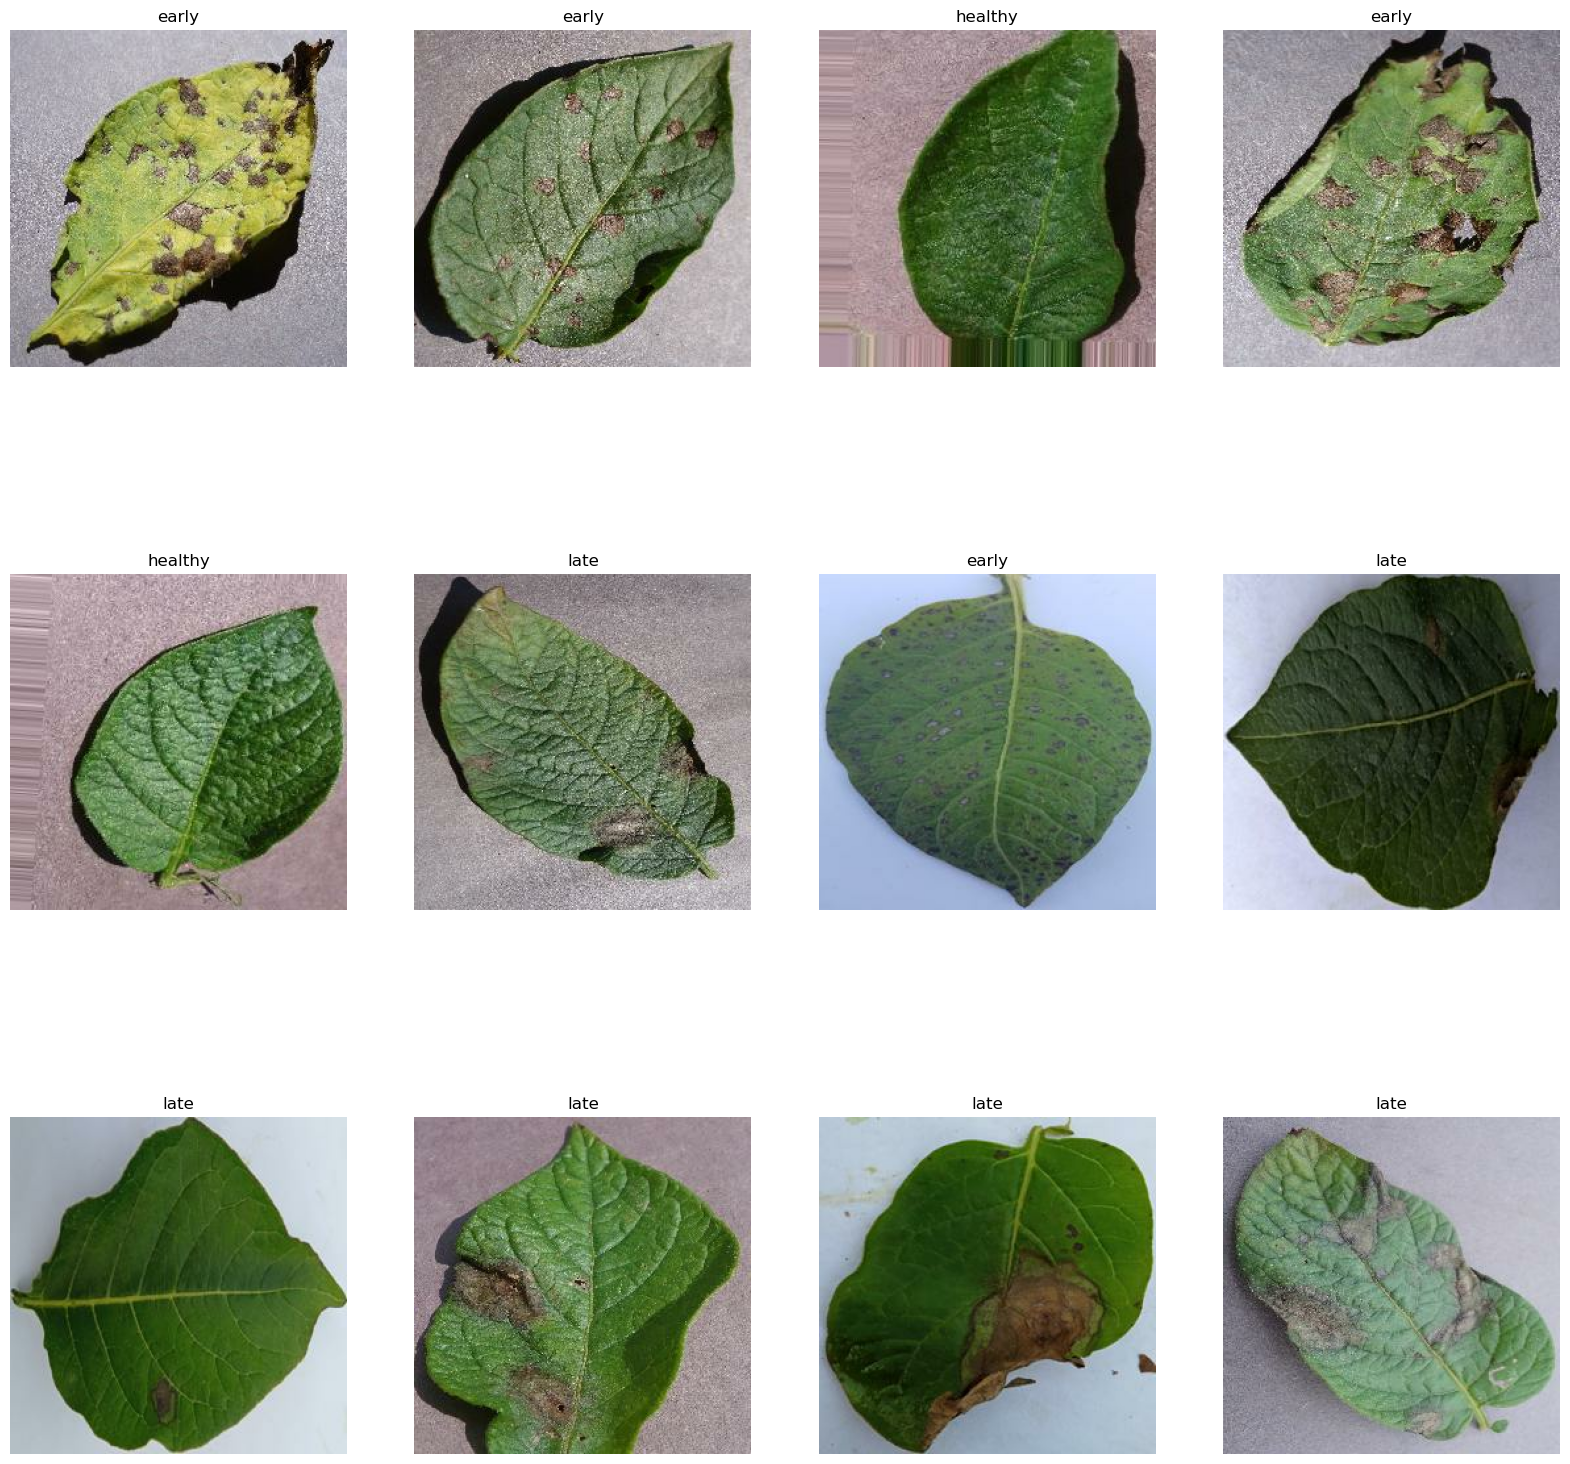

In [28]:
    plt.figure(figsize=(20, 20))
    for image_batch, labels_batch in dataset.take(1):
        for i in range(12):
            ax = plt.subplot(3, 4, i + 1)
            plt.imshow(image_batch[i].numpy().astype("uint8"))
            plt.title(class_names[labels_batch[i]])
            plt.axis("off")

In [29]:
print("Size of Data is :{0} \nBatch size of Training Data is :{1}\nBatch size of Validation Data is :{2} \nBatch size of Testing Data is :{3} " .format(len(dataset), len(train_ds), len(val_ds), len(test_ds)))


Size of Data is :13 
Batch size of Training Data is :10
Batch size of Validation Data is :1 
Batch size of Testing Data is :2 


In [30]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [35]:
input_shape= (BATCH_SIZE , IMAGE_SIZE, IMAGE_SIZE ,chanels)
n_classes = 3
model  = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,kernel_size=(3,3), activation ='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3), activation ='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3), activation ='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3), activation ='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3), activation ='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3), activation ='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(n_classes, activation = 'softmax'),
])
model.build(input_shape=input_shape)

In [36]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

In [37]:
model.compile(
     optimizer='adam',
     loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
     metrics=['accuracy']
 )

In [38]:
history= model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data = val_ds,
    epochs= EPOCHS,
)

Epoch 1/20


10/10 [==============================] - 17s 1s/step - loss: 1.0999 - accuracy: 0.3090 - val_loss: 1.0904 - val_accuracy: 0.4375
Epoch 2/20
10/10 [==============================] - 12s 1s/step - loss: 1.0944 - accuracy: 0.3455 - val_loss: 1.0492 - val_accuracy: 0.4375
Epoch 3/20
10/10 [==============================] - 12s 1s/step - loss: 1.0513 - accuracy: 0.3621 - val_loss: 0.9495 - val_accuracy: 0.4688
Epoch 4/20
10/10 [==============================] - 12s 1s/step - loss: 0.9368 - accuracy: 0.5316 - val_loss: 0.8660 - val_accuracy: 0.5625
Epoch 5/20
10/10 [==============================] - 12s 1s/step - loss: 0.7234 - accuracy: 0.6545 - val_loss: 0.5425 - val_accuracy: 0.7812
Epoch 6/20
10/10 [==============================] - 12s 1s/step - loss: 0.6338 - accuracy: 0.6977 - val_loss: 0.4799 - val_accuracy: 0.7500
Epoch 7/20
10/10 [==============================] - 12s 1s/step - loss: 0.6900 - accuracy: 0.6678 - val_loss: 0.4862 - val_accuracy: 0.7812
Epoch 8/20
10/10 [

In [39]:
score = model.evaluate(test_ds)

2/2 [==============================] - 1s 278ms/step - loss: 0.4668 - accuracy: 0.8281


In [40]:
score

[0.46682247519493103, 0.828125]

In [41]:
history

In [42]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 10}

In [43]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [44]:
history.history["loss"]

[1.0998690128326416,
 1.0944451093673706,
 1.0512701272964478,
 0.936755895614624,
 0.7234241366386414,
 0.6337626576423645,
 0.6899755001068115,
 0.6441964507102966,
 0.5353257060050964,
 0.47728416323661804,
 0.43465709686279297,
 0.5764138102531433,
 0.5724470019340515,
 0.532044529914856,
 0.4230988025665283,
 0.42320457100868225,
 0.5438590049743652,
 0.35990190505981445,
 0.47000861167907715,
 0.5124163627624512]

In [45]:
history.history["accuracy"]

[0.3089700937271118,
 0.3455149531364441,
 0.3621262311935425,
 0.5315614342689514,
 0.6544850468635559,
 0.6976743936538696,
 0.6677740812301636,
 0.7176079750061035,
 0.7807309031486511,
 0.8106312155723572,
 0.8471760749816895,
 0.7873753905296326,
 0.7774086594581604,
 0.7840531468391418,
 0.8471760749816895,
 0.8604651093482971,
 0.7774086594581604,
 0.8770763874053955,
 0.7940199375152588,
 0.7873753905296326]

In [46]:
acc = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss =history.history['val_loss']

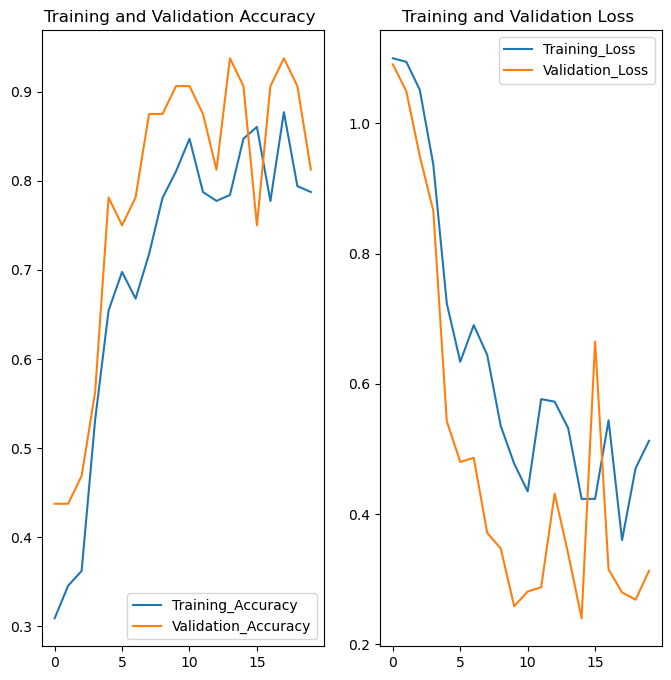

In [47]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS) , acc ,label='Training_Accuracy')
plt.plot(range(EPOCHS) , val_accuracy ,label='Validation_Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy ')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS) , loss ,label='Training_Loss')
plt.plot(range(EPOCHS) , val_loss ,label='Validation_Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss ')
plt.show()


First image to predict
Actual label: early
1/1 [==============================] - 1s 592ms/step
Predicted label: early


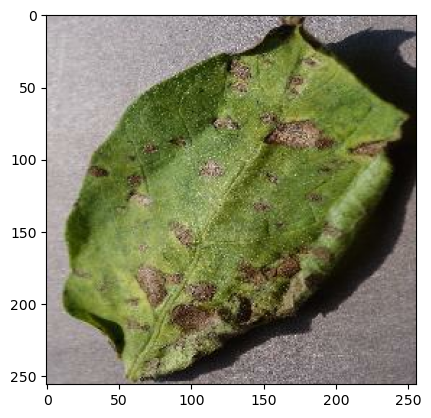

In [48]:
for image_batch , label_batch in test_ds.take(1):
  first_image = image_batch[0].numpy().astype("uint8")
  print("First image to predict")
  plt.imshow(first_image)
  print("Actual label:",class_names[labels_batch[0].numpy()])

  batch_prediction = model.predict(image_batch)
  print("Predicted label:", class_names[np.argmax(batch_prediction[0])])

In [49]:
def predict(model,img):
  img_array = tf.keras.preprocessing.image.img_to_array(image[i].numpy())
  img_array = tf.expand_dims(img_array,0)#Create a batch

  predictions = model.predict(img_array)

  predicted_class = class_names[np.argmax(predictions[0])]
  confidence = round(100 * (np.max(predictions[0])),2)
  return predicted_class , confidence

1/1 [==============================] - 0s 55ms/step


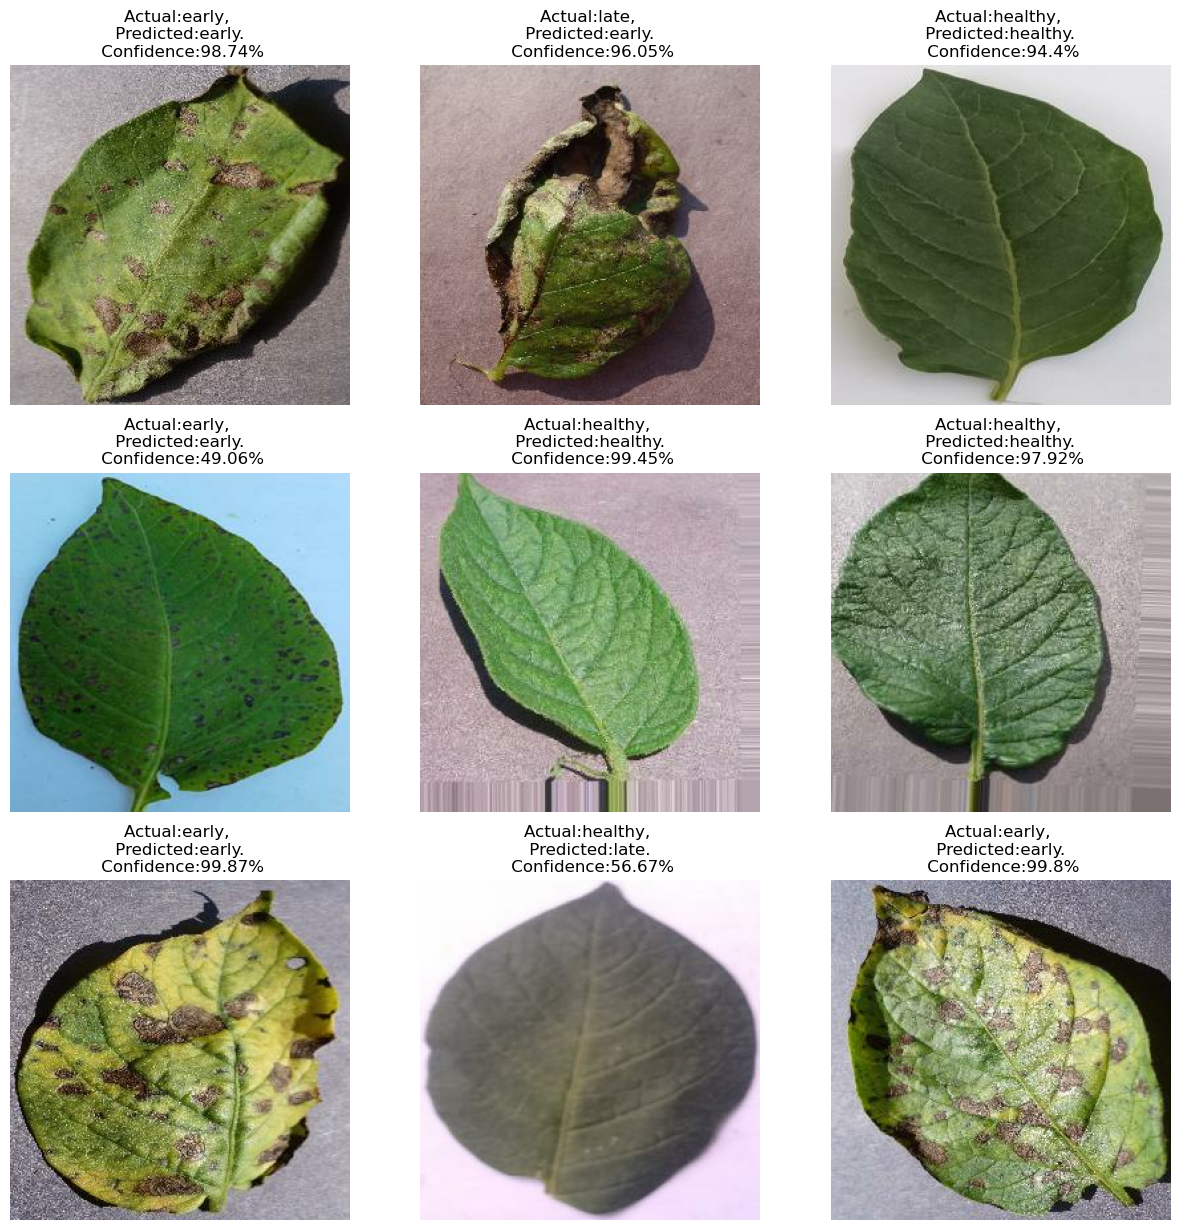

In [50]:
plt.figure(figsize=(15,15))
for image,labels in test_ds.take(1):
    for i in range(9):
      ax = plt.subplot(3,3 , i+1)
      plt.imshow(image[i].numpy().astype("uint8"))
      predicted_class , confidence = predict(model , image[i].numpy())

      actual_class = class_names[labels[i]]
      plt.title(f"Actual:{actual_class}, \n Predicted:{predicted_class}. \n Confidence:{confidence}%" )
      plt.axis("off")